# Symbulate Documentation

# Common Discrete Distributions

1. [**Introduction to discrete distributions and random variables**](#discrete)
1. [**Defining a general discrete distribution with `BoxModel`**](#boxmodel)
1. [**Discrete Uniform**](#discrete_unif)
1. [**Bernoulli**](#bernoulli)
1. [**Binomial**](#binomial)
1. [**Hypergeometric**](#hyper)
1. [**Poisson**](#poisson)
1. [**Geometric**](#geometric)
1. [**Negative Binomial**](#negative_binomial) (and the related [Pascal](#pascal))

< [Cards, coins, dice](common_cards_coins_dice.html) | [Contents](index.html) | [Common continuous distributions](common_continuous.html) >

Be sure to import Symbulate using the following commands.

In [1]:
from symbulate import *
%matplotlib inline

<a id='discrete'></a>
### Introduction to discrete distributions and random variables

<a id='pmf'></a>
A **discrete probability distribution** assigns positive probability to the values in some countable set.  A discrete distribution can be specified by a **probability mass function (pmf)**, $p(\cdot)$, which maps a value $x$ to its probability $p(x)\in [0,1]$.  A probability mass function must satisfy $\sum_x p(x) = 1$.

A **discrete random variable** $X$ defined on a probability space with probability measure $P$ has a probability mass function $p_X$ defined by $p_X(x) = P(X = x)$.  The expected value of a discrete random variable is

$$
E(X) = \sum_x x\, p_X(x) = \sum_x x P(X=x)
$$

<a id='boxmodel'></a>
### Defining a general discrete distribution with `BoxModel`

A discrete distribution can be specified via a [`BoxModel`](probspace.html#boxmodel) where the tickets represent possible values (i.e. the values with non-zero probability) and the `probs` option specifies the probabilities.

*Example.* A certain probability mass function $p$ satisfies $p(1) = 0.4$, $p(2) = 0.2$, $p(5) = 0.3$, $p(10)=0.1$, and $p(x)=0$ otherwise.

In [2]:
P = BoxModel([1, 2, 5, 10], probs=[0.4, 0.2, 0.3, 0.1])
P.sim(10000).tabulate(normalize=True)

1,0.4092
2,0.1954
5,0.2933
10,0.1021
Total,1.0


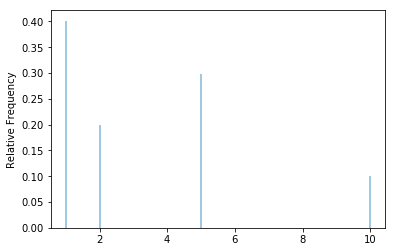

In [3]:
RV(P).sim(10000).plot()

<a id='discrete_unif'></a>
### Discrete Uniform

A **discrete Uniform** distribution with parameters $a$ and $b$, `DiscreteUniform(a, b)`, assigns equal probability to each integer between $a$ and $b$ (inclusive), as specified by the probability mass function

$$
p(x) = \frac{1}{b - a + 1}, \qquad x \in \{a, a+1, \ldots, b-1, b\}
$$

If $X$ is a random variable with a `DiscreteUniform(a, b)` distribution then

$$
\begin{align*}
E(X) & = \frac{a + b + 1}{2} \\
Var(X) & = \frac{(a + b)^2 - 1}{12}
\end{align*}
$$

*Example.* Actual and simulated pmf for `DiscreteUniform(a=1, b=6)`.

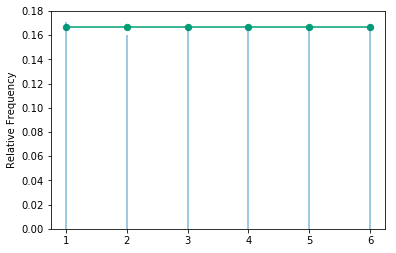

In [4]:
sims = RV(DiscreteUniform(a=1, b=6)).sim(10000)
sims.plot()
DiscreteUniform(a=1, b=6).plot()

In [5]:
print('The simulated mean is: {:.2f}'.format(sims.mean()))
print('The true mean is: {:.2f}'.format(DiscreteUniform(a=1, b=6).mean()))

The simulated mean is: 3.50
The true mean is: 3.50


In [6]:
print('The simulated variance is: {:.2f}'.format(sims.var()))
print('The true variance is: {:.2f}'.format(DiscreteUniform(a=1, b=6).var()))

The simulated variance is: 2.94
The true variance is: 2.92


*Example*. `DiscreteUniform(a = 1, b)` pmf.

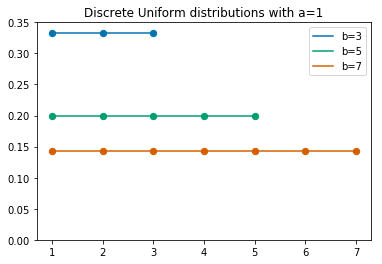

In [7]:
bs = [3, 5, 7]
for b in bs:
    DiscreteUniform(a=1, b=b).plot()
    
plt.legend(["b=" + str(i) for i in bs])
plt.title("Discrete Uniform distributions with a=1")

<a id='bernoulli'></a>
### Bernoulli distributions

A **Bernoulli($p$)** distribution takes value 1 with probability $p$ and 0 with probability $1-p$.

If $X$ is a random variable with a Bernoulli($p$) distribution then

$$
\begin{align*}
E(X) & = p \\
Var(X) & = p(1-p)
\end{align*}
$$

*Example.* Simulated pmf for `Bernoulli(p=0.3)`.

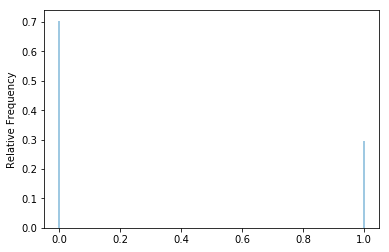

In [8]:
RV(Bernoulli(0.3)).sim(10000).plot()

In [9]:
print('The simulated mean is: {:.2f}'.format(sims.mean()))
print('The true mean is: {:.2f}'.format(Bernoulli(0.3).mean()))

The simulated mean is: 3.50
The true mean is: 0.30


In [10]:
print('The simulated variance is: {:.2f}'.format(sims.var()))
print('The true variance is: {:.2f}'.format(Bernoulli(0.3).var()))

The simulated variance is: 2.94
The true variance is: 0.21


<a id='binomial'></a>
### Binomial distributions

**Binomial** distributions are often used to model the number of successes observed in a fixed number (n) of Bernoulli(p) trials (independent, success/failure trials, with probability of success p on each trial). A `Binomial` distribution with parameters `n` (a nonnegative integer) and `p` (in [0,1]) is specified by the probability mass function

$$
\binom{n}{x} p^x (1-p)^{n-x}, \qquad x = 0, 1, 2, \ldots, n
$$

If $X$ is a random variable with a Binomial($n, p$) distribution then

$$
\begin{align*}
E(X) & = np \\
Var(X) & = np(1-p)
\end{align*}
$$

*Example.* Actual and simulated pmf for `Binomial(n=10, p=0.4)`.

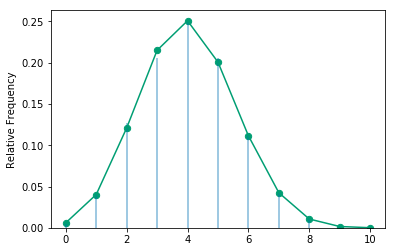

In [11]:
sims = RV(Binomial(10, 0.4)).sim(10000)
sims.plot()
Binomial(10, 0.4).plot()

In [12]:
print('The simulated mean is: {:.2f}'.format(sims.mean()))
print('The true mean is: {:.2f}'.format(Binomial(10, 0.4).mean()))

The simulated mean is: 4.01
The true mean is: 4.00


In [13]:
print('The simulated variance is: {:.2f}'.format(sims.var()))
print('The true variance is: {:.2f}'.format(Binomial(10, 0.4).var()))

The simulated variance is: 2.41
The true variance is: 2.40


*Example.* `Binomial(n=10, p)` pmf.

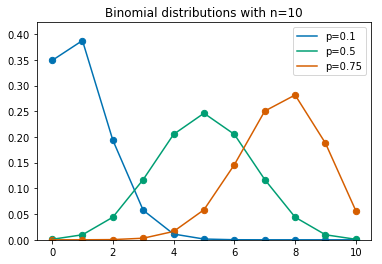

In [14]:
ps = [0.10, 0.50, 0.75]
for p in ps:
    Binomial(10, p).plot()

plt.legend(["p=" + str(i) for i in ps])
plt.title("Binomial distributions with n=10")

*Example.* `Binomial(n, p=0.4)` pmf.

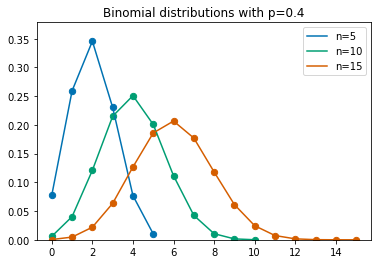

In [15]:
ns = [5, 10, 15]
for n in ns:
    Binomial(n, 0.4).plot()

plt.legend(["n=" + str(i) for i in ns])
plt.title("Binomial distributions with p=0.4")

<a id='hyper'></a>
### Hypergeometric distributions

**Hypergeometric** distributions are used to model the number of "successes" in `n` (a nonnegative integer) draws without replacement from a box containing $N_0$ failures and $N_1$ successes. A `hypergeometric` distribution is specified by the probability mass function
$$
\frac{\binom{N_1}{x}\binom{N_0}{n-x}}{\binom{N_0 + N_1}{n}}, \quad x = 0,1, \ldots, n;\; x \le N_1;\; n-x \le N_0
$$
If $X$ is a random variable with a Hypergeometric($n,  N_0, N_1$) distribution then
$$
\begin{align*}
E(X) & = \frac{n N_1}{N_0 + N_1} \\
Var(X) & = \frac{n N_1(N_0)(N_0 + N_1 - n)}{(N_0 + N_1)^2(N_0 + N_1 - 1)}
\end{align*}
$$


*Example.* Actual and simulated pmf for `Hypergeometric(n=5, N0=5, N1=10)`.

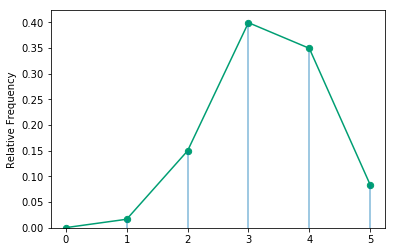

In [16]:
sims = RV(Hypergeometric(n=5, N0=5, N1=10)).sim(10000)
sims.plot()
Hypergeometric(n=5, N0=5, N1=10).plot()

In [17]:
print('The simulated mean is: {:.2f}'.format(sims.mean()))
print('The true mean is: {:.2f}'.format(Hypergeometric(n=5, N0=5, N1=10).mean()))

The simulated mean is: 3.34
The true mean is: 3.33


In [18]:
print('The simulated variance is: {:.2f}'.format(sims.var()))
print('The true variance is: {:.2f}'.format(Hypergeometric(n=5, N0=5, N1=10).var()))

The simulated variance is: 0.79
The true variance is: 0.79


*Example.* `Hypergeometric(n=10, N0=10, N1)` pmf.

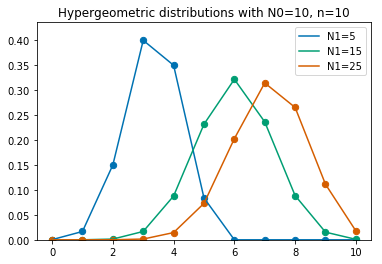

In [19]:
N1s = [5, 15, 25]
for N1 in N1s:
    Hypergeometric(10, 10, N1).plot()

plt.legend(["N1=" + str(i) for i in N1s])
plt.title("Hypergeometric distributions with N0=10, n=10")

*Example.* `Hypergeometric(n=10, N0, N1= 10)` pmf.

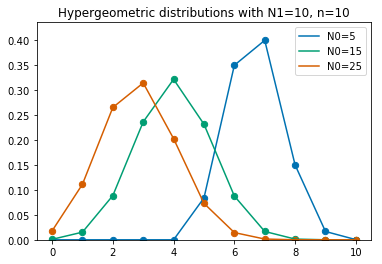

In [20]:
N0s = [5, 15, 25]
for N0 in N0s:
    Hypergeometric(10, N0, 10).plot()

plt.legend(["N0=" + str(i) for i in N0s])
plt.title("Hypergeometric distributions with N1=10, n=10")

<a id='poisson'></a>
### Poisson distributions

A **Poisson** distribution with parameter $\lambda>0$ is specified by the probability mass function
$$
\frac{e^{-\lambda} \lambda^x}{x!}, \quad x = 0, 1, 2, \ldots
$$
If $X$ is a random variable with a Poisson($\lambda$) distribution then
$$
\begin{align*}
E(X) & = \lambda \\
Var(X) & = \lambda
\end{align*}
$$

*Example.* Actual and simulated pmf for `Poisson(lam=5)`.

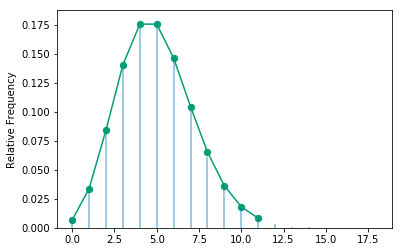

In [21]:
sims = RV(Poisson(lam = 5)).sim(10000)
sims.plot()
Poisson(lam = 5).plot()

In [22]:
print('The simulated mean is: {:.2f}'.format(sims.mean()))
print('The true mean is: {:.2f}'.format(Poisson(lam=5).mean()))

The simulated mean is: 4.98
The true mean is: 5.00


In [23]:
print('The simulated variance is: {:.2f}'.format(sims.var()))
print('The true variance is: {:.2f}'.format(Poisson(lam=5).var()))

The simulated variance is: 5.02
The true variance is: 5.00


*Example.* `Poisson(`$\lambda$`)` pmf.

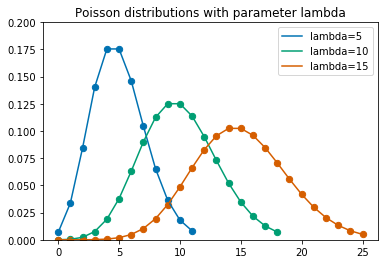

In [24]:
lams = [5, 10, 15]
for lam in lams:
    Poisson(lam).plot()

plt.legend(["lambda=" + str(i) for i in lams])
plt.title("Poisson distributions with parameter lambda")

<a id='geometric'></a>
### Geometric distributions

**Geometric** distributions are often used to model the number of Bernoulli($p$) (independent, success/failure) trials needed to achieve the first success.  A geometric distribution with parameter `p` (in [0,1]) is specified by the probability mass function
$$
p(1-p)^{x-1}, \quad x = 1, 2, 3,\ldots 
$$
If $X$ is a random variable with a Geometric(p) distribution then
$$
\begin{align*}
E(X) & = \frac{1}{p} \\
Var(X) & = \frac{(1 - p)}{p^2}
\end{align*}
$$

*Example.* Actual and simulated pmf for `Geometric(p=0.4)`.

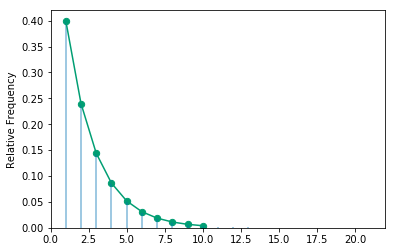

In [25]:
sims = RV(Geometric(p=0.4)).sim(10000)
sims.plot()
Geometric(p=0.4).plot()

In [26]:
print('The simulated mean is: {:.2f}'.format(sims.mean()))
print('The true mean is: {:.2f}'.format(Geometric(p=0.4).mean()))

The simulated mean is: 2.49
The true mean is: 2.50


In [27]:
print('The simulated variance is: {:.2f}'.format(sims.var()))
print('The true variance is: {:.2f}'.format(Geometric(p=0.4).var()))

The simulated variance is: 3.63
The true variance is: 3.75


*Example.* `Geometric(p)` pmf.

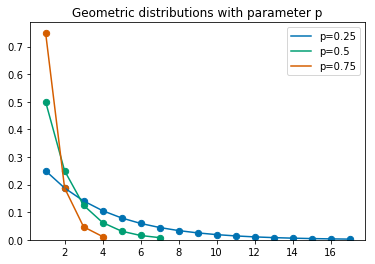

In [28]:
ps = [0.25, 0.50, 0.75]
for p in ps:
    Geometric(p).plot()

plt.legend(["p=" + str(i) for i in ps])
plt.title("Geometric distributions with parameter p")

<a id='negative_binomial'></a>
### Negative binomial distributions

**Negative binomial** distributions are often used to model the number of Bernoulli($p$) (independent, success/failure) trials needed to achieve a specified number of successes ($r$).  A negative binomial distribution with parameters $p$ and $r$ is specified by the probability mass function
$$
\binom{x-1}{r-1}p^r(1-p)^{x-r}, \quad x = r, r+1, r+2,\ldots 
$$
If $X$ is a random variable with a NegativeBinomial($r, p$) distribution then
$$
\begin{align*}
E(X) & = \frac{r}{p} \\
Var(X) & = \frac{r(1 - p)}{p^2}
\end{align*}
$$


*Example.* Actual and simulated pmf for `NegativeBinomial(r=3, p=0.4)`.

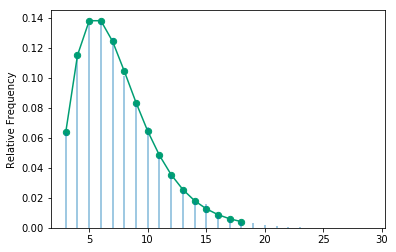

In [29]:
sims = RV(NegativeBinomial(r=3, p=0.4)).sim(10000)
sims.plot()
NegativeBinomial(r=3, p=0.4).plot()

In [30]:
print('The simulated mean is: {:.2f}'.format(sims.mean()))
print('The true mean is: {:.2f}'.format(NegativeBinomial(r=3, p=0.4).mean()))

The simulated mean is: 7.52
The true mean is: 7.50


In [31]:
print('The simulated variance is: {:.2f}'.format(sims.var()))
print('The true variance is: {:.2f}'.format(NegativeBinomial(r=3, p=0.4).var()))

The simulated variance is: 11.14
The true variance is: 11.25


*Example.* `NegativeBinomial(r, p=0.5)` pmf.

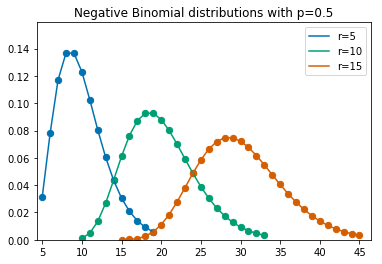

In [32]:
rs = [5, 10, 15]
for r in rs:
    NegativeBinomial(r, p=0.5).plot()

plt.legend(["r=" + str(i) for i in rs])
plt.title("Negative Binomial distributions with p=0.5")

*Example.* `NegativeBinomial(r=5, p)` pmf.

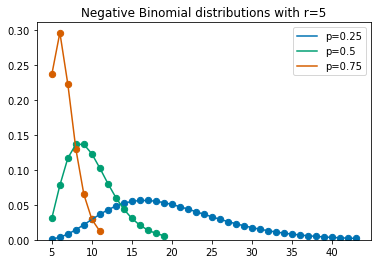

In [33]:
ps = [0.25, 0.50, 0.75]
for p in ps:
    NegativeBinomial(r=5, p=p).plot()

plt.legend(["p=" + str(i) for i in ps])
plt.title("Negative Binomial distributions with r=5")

<a id='pascal'></a>
### Pascal distributions

A **Pascal** distribution has the same shape as a negative binomial distribution, but the distribution is supported on $\{0, 1, 2, \ldots\}$ rather than $\{r, r+1, r+2, \ldots\}$ with the probability mass function
$$
\binom{x+r-1}{r-1}p^r(1-p)^{x}, \quad x = 0, 1, 2,\ldots 
$$
If Bernoulli($p$) trials are performed until $r$ successes are achieved, then the number of *failures* observed will have a Pascal distribution.

If $X$ is a random variable with a Pascal($r, p$) distribution then
$$
\begin{align*}
E(X) & = \frac{r(1 - p)}{p} \\
Var(X) & = \frac{r(1 - p)}{p^2}
\end{align*}
$$

*Example.* Actual and simulated pmf for `Pascal(r=3, p=0.4)`.

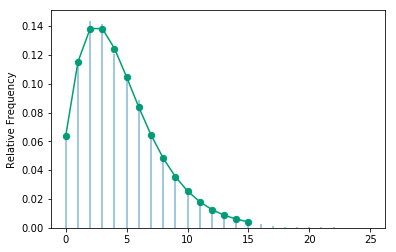

In [34]:
sims = RV(Pascal(r=3, p=0.4)).sim(10000)
sims.plot()
Pascal(r = 3, p = 0.4).plot()

In [35]:
print('The simulated mean is: {:.2f}'.format(sims.mean()))
print('The true mean is: {:.2f}'.format(Pascal(r=3, p=0.4).mean()))

The simulated mean is: 4.48
The true mean is: 4.50


In [36]:
print('The simulated variance is: {:.2f}'.format(sims.var()))
print('The true variance is: {:.2f}'.format(Pascal(r=3, p=0.4).var()))

The simulated variance is: 10.94
The true variance is: 11.25


*Example.* `Pascal(r, p=0.5)` pmf.

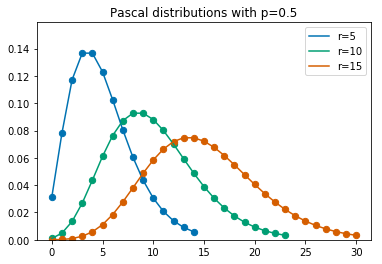

In [37]:
rs = [5, 10, 15]
for r in rs:
    Pascal(r, p=0.5).plot()

plt.legend(["r=" + str(i) for i in rs])
plt.title("Pascal distributions with p=0.5")

*Example.* `Pascal(r=5, p)` pmf.

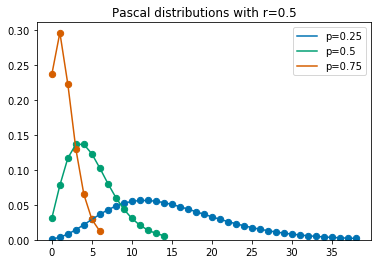

In [38]:
ps = [0.25, 0.50, 0.75]
for p in ps:
    Pascal(r=5, p=p).plot()

plt.legend(["p=" + str(i) for i in ps])
plt.title("Pascal distributions with r=0.5")

< [Cards, coins, dice](common_cards_coins_dice.html) | [Contents](index.html) | [Common continuous distributions](common_continuous.html) >